# Библиотека Pandas

Будем работать с данными, собранными благодаря опросу студентов математического курса средней школы в Португалии (возраст - от 15 до 22 лет). Они находятся в файле "math_students.csv". Целевой переменной является итоговая оценка студента за курс.

https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# если данные и ноутбук находятся в разных папках, то для загрузки файла помимо названия необходимо также прописать путь к нему
# .csv - текстовый файл для представления табличных данных, разделенных каким-то символом. В данном случае - запятой

#data = pd.read_csv('math_students.csv', delimiter=',')
url = 'https://raw.githubusercontent.com/new-okaerinasai/math-ml-hse-2019/master/sem01_intro/math_students.csv'
data = pd.read_csv(url, on_bad_lines='skip', delimiter=',')

# функция .head(n) выводит первые n строк таблицы (по умолчанию n=5)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Аналогично, можно смотреть не на верхние строки таблицы, а на нижние:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [7]:
# В данном случае объектами являются студенты, признаками - различные их характеристики. Найдем число и тех, и других:
data.shape

(395, 33)

Итак, всего объектов 395, а признаков - 32 (учитываем, что один из столбцов - это целевая переменная). Все признаки имеют разную природу. Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

In [5]:
# Для вывода названий всех колонок есть специальная функция:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
# Как получить таблицу без последней колонки?
data[data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10


In [7]:
data.iloc[:, :-1].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10


In [8]:
data.loc[:, data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10


In [9]:
data.drop(['G3'], axis=1).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10


In [8]:
# Посмотрим, есть ли в данных пропуски:
data.isnull().any().any()

False

In [11]:
# Какие значения принимает признак guardian?
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [14]:
guard = data['guardian'].unique()
print(len(guard))

data['guardian'].nunique()

3


3

In [15]:
data['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [16]:
# Выделим только тех студентов, у которых опекуном является мать и которая работает учителем или на дому:
data[(data['guardian'] == 'mother') & ((data['Mjob'] == 'teacher') | (data['Mjob'] == 'at_home'))].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
10,GP,F,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0,10,8,9
13,GP,M,15,U,GT3,T,4,3,teacher,other,course,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,5,4,3,1,2,3,2,10,10,11
20,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,1,1,1,1,0,13,14,15


Проанализируем взаимосвязь количества пропусков и успехов в учебе. Посмотрим на распределение количества пропусков у студентов:

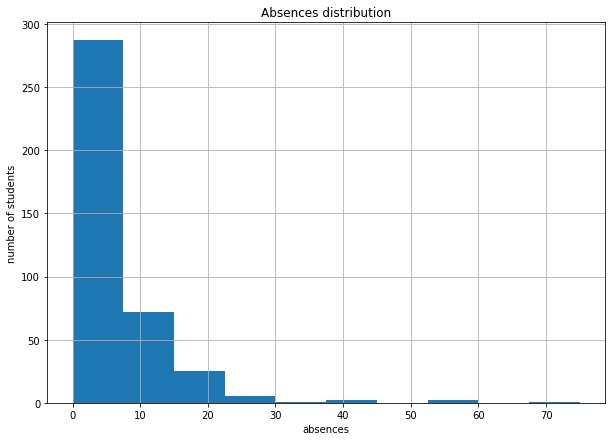

In [17]:
plt.figure(figsize=(10,7))
plt.title('Absences distribution')
data['absences'].hist()
plt.xlabel('absences')
plt.ylabel('number of students')
plt.show()

In [18]:
# Посмотрим на среднее количество пропусков:
data['absences'].mean()

5.708860759493671

Итак, из гистограммы и полученного значения можно сделать вывод, что большинство студентов пропускает не так много занятий. 

Теперь посмотрим влияние количества пропусков на итоговую оценку. Для этого разделим студентов на две части: те, у кого количество пропусков меньше среднего, и те, у кого оно не меньше среднего.

In [19]:
mean_absences = data['absences'].mean()
stud_few_absences = data[data['absences'] < mean_absences]
stud_many_absences = data[data['absences'] >= mean_absences]

In [20]:
# Посмотрим, сколько получилось и тех, и других.

print('Students with few absences:', stud_few_absences.shape[0])
print('Students with many absences:', stud_many_absences.shape[0])

Students with few absences: 249
Students with many absences: 146


In [21]:
# Посчитаем среднее значение целевой переменной для каждой части.

stud_few_absences_g3 = stud_few_absences['G3'].mean()
stud_many_absences_g3 = stud_many_absences['G3'].mean()
print('Students with few absences, mean G3:', stud_few_absences_g3)
print('Students with many absences, mean G3:', stud_many_absences_g3)

Students with few absences, mean G3: 10.168674698795181
Students with many absences, mean G3: 10.835616438356164


Итак, средние оценки примерно одинаковы - у тех, кто пропускал меньше занятий, она чуть хуже.

Также данные можно исследовать с помощью группировки и агрегирования. Например, исследуем закономерности, связанные с разными школами. Сгруппируем объекты по школам:

In [22]:
data_by_school = data.groupby('school')
data_by_school.describe()

age                                    ...   G3                        
        count       mean       std   min    25%  ...  min  25%   50%    75%   max
school                                           ...                             
GP      349.0  16.521490  1.216610  15.0  16.00  ...  0.0  8.0  11.0  14.00  20.0
MS       46.0  18.021739  0.881643  17.0  17.25  ...  0.0  8.0  10.0  12.75  19.0

[2 rows x 128 columns]

In [23]:
# Теперь посмотрим на среднее значение признаков для каждой школы:

data_by_school.mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.939828,10.782235,10.489971
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,10.673913,10.195652,9.847826


Можно заметить, например, что в среднем до школы Mousinho da Silveira студентам нужно добираться дольше, чем до Gabriel Pereira. Интересно, что, несмотря на это, в среднем количество пропусков у них меньше.

## ДЗ

1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [ ]:
data['reason']....

2. Найдите количество студентов, у родителей которых нет никакого образования.

3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

4. Найдите количество студентов, имеющих нечетное число пропусков.

5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*

### Ссылки на дополнительные источники информации:

https://nagornyy.me/it/osnovy-analiza-dannykh-v-pandas/

https://habr.com/ru/company/ruvds/blog/494720/

https://github.com/hse-ds/iad-intro-ds/blob/master/2022/seminars/sem02_pandas.ipynb

#### Знакомство с Pandas на примере датасета «Титаник»
https://dou.ua/forums/topic/33807/